In [1]:
import seaborn as sns

Text(10, 30, 'y = 5 + 0.6 * x')

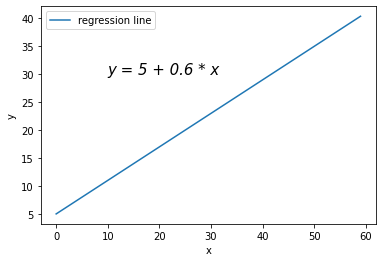

In [2]:
#создадим датасет для отрисовки сути линейной регрессии
x = [i for i in range (0, 60, 1)]
y = [5 + 0.6*i for i in x]

#построим нашу линию
ax = sns.lineplot(x=x, y=y, label='regression line')
ax.set(xlabel='x', ylabel='y')
ax.text(x=10, y=30, s = 'y = 5 + 0.6 * x', size = 15, style='oblique')

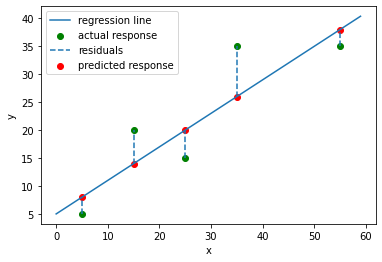

In [3]:
# добавим новый наблюдения на нашу регрессию
ax = sns.lineplot(x=x, y=y, label='regression line')
ax.set(xlabel='x', ylabel='y')

x_scatter = [5, 15, 25, 35, 55]
y_scatter = [5, 20, 15, 35, 35]

#ставим новую точку на график - новые входные данные
ax.set(xlabel='x', ylabel='y')
ax.scatter(x=x_scatter, y=y_scatter, c='green', label='actual response')

#проводим прямую до регрессионной линии
ymin = [min(y_scatter[point],y[x_scatter[point]]) for point in range(5)]
ymax =[max(y_scatter[point],y[x_scatter[point]]) for point in range(5)]
ax.vlines(x=x_scatter, ymin = ymin, ymax=ymax, linestyles='--', label='residuals')
    
#находим отклик на прямой
ax.scatter(x=x_scatter, y = [y[x_scatter[point]] for point in range(5)], c='red', label='predicted response') 

ax.legend()

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [5]:
#обучаем модель
lr_model = LinearRegression()
lr_model.fit(np.array(x).reshape(-1,1), y)

print(f'Получившиеся уравнение: y = {lr_model.intercept_} + {lr_model.coef_} * x')

Получившиеся уравнение: y = 4.999999999999993 + [0.6] * x


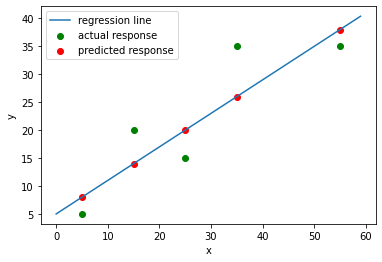

In [6]:
#смотрим на получившиеся результаты модели
ax = sns.lineplot(x=x, y=lr_model.predict(np.array(x).reshape(-1,1)), label='regression line')
ax.set(xlabel='x', ylabel='y')

ax.scatter(x=x_scatter, y=y_scatter, c='green', label='actual response')
ax.scatter(x=x_scatter, y =lr_model.predict(np.array(x_scatter).reshape(-1,1)), c='red', label='predicted response') 
ax.legend()

In [7]:
#расчитываем эмпирический риск
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y, lr_model.predict(np.array(x).reshape(-1,1)))
print(f'MSE: {MSE}')

MSE: 1.9760965675786346e-29


In [8]:
#расчитываем эмпирический риск и коэффициент детерминации
import statsmodels.api as sm

x_with_constant = sm.add_constant(x)
lr_model_ols = sm.OLS(y,x_with_constant).fit()

print(f'Determenation coeffition: {lr_model_ols.rsquared_adj}')
MSE = mean_squared_error(y, lr_model_ols.predict(x_with_constant))
print(f'MSE: {MSE}')

Determenation coeffition: 1.0
MSE: 1.4068019476441376e-29


In [9]:
lr_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.451e+32
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:14:02   Log-Likelihood:                 1907.9
No. Observations:                  60   AIC:                            -3812.
Df Residuals:                      58   BIC:                            -3808.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0000   9.73e-16   5.14e+15      0.000       5.000       5.000
x1             0.6000   2.84e-17   2.11e+16      0.000       0.600       0.600
==============================================================================
Omnibus:                       10.060   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.824
Skew:                           0.849   Prob(JB):                      0.00736
Kurtosis:                       4.023   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#https://www.kaggle.com/datasets/abrambeyer/openintro-possum
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [11]:
df_possum = pd.read_csv('possum.csv')

In [12]:
df_possum

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [13]:
df_possum.sex = df_possum.sex.map({'m': 1, 'f': 0})
df_possum.Pop = df_possum.Pop.map({'Vic': 1, 'other': 0})
df_possum = df_possum.join(pd.get_dummies(df_possum.site, prefix = 'site'))
df_possum.drop(['case', 'site'], axis=1, inplace=True)
df_possum.dropna(inplace=True)

In [14]:
df_possum

,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,site_1,site_2,site_3,site_4,site_5,site_6,site_7
0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1,0,0,0,0,0,0
1,1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1,0,0,0,0,0,0
2,1,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1,0,0,0,0,0,0
3,1,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1,0,0,0,0,0,0
4,1,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,0,0,0,0,0,0,1
100,0,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,0,0,0,0,0,0,1
101,0,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,0,0,0,0,0,0,1
102,0,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,0,0,0,0,0,0,1


In [15]:
X = df_possum.drop('totlngth', axis=1)
y = df_possum.iloc[:, 5]

X = (X - X.mean(axis=0)) / (X.std(axis=0))

X_with_constant = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X_with_constant, y, train_size=0.7, random_state = 777)

lr_model_ols = sm.OLS(y_train, X_train).fit()

In [16]:
lr_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               totlngth   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     15.24
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.90e-14
Time:                        12:14:10   Log-Likelihood:                -136.85
No. Observations:                  70   AIC:                             307.7
Df Residuals:                      53   BIC:                             345.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.2004      0.243    359.557      0.000      86.714      87.687
Pop           -0.0850      0.460     -0.185      0.854      -1.008       0.838
sex           -0.4726      0.271     -1.741      0.087      -1.017       0.072
age           -0.0901      0.268     -0.337      0.738      -0.627       0.447
hdlngth        1.3900      0.427      3.256      0.002       0.534       2.246
skullw         0.3634      0.357      1.018      0.313      -0.353       1.079
taill          2.0344      0.374      5.433      0.000       1.283       2.785
footlgth       1.1431      0.620      1.845      0.071      -0.100       2.386
earconch       0.4236      0.766      0.553      0.582      -1.112       1.959
eye           -0.1705      0.298     -0.572      0.570      -0.768       0.427
chest         -0.2228      0.408     -0.546      0.587      -1.041       0.595
belly          0.2124      0.369      0.575      0.568      -0.528       0.953
site_1         0.3970      0.383      1.037      0.305      -0.371       1.165
site_2        -0.7643      0.279     -2.737      0.008      -1.324      -0.204
site_3         0.1266      0.236      0.537      0.593      -0.346       0.599
site_4        -0.1522      0.287     -0.530      0.598      -0.728       0.423
site_5         0.2433      0.266      0.914      0.365      -0.291       0.777
site_6         0.0619      0.336      0.184      0.854      -0.612       0.735
site_7        -0.1402      0.267     -0.525      0.602      -0.676       0.395
==============================================================================
Omnibus:                        1.306   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.267
Skew:                          -0.209   Prob(JB):                        0.531
Kurtosis:                       2.491   Cond. No.                     3.07e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.36e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Determenation coeffition: 0.7675592377326723
MSE train: 2.9213025753419095
MSE train: 5.371488422922061


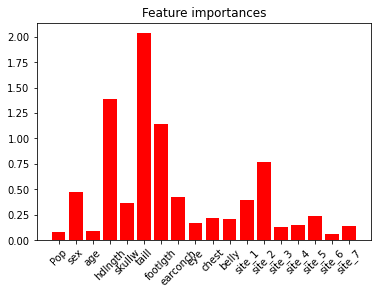

In [18]:
import matplotlib.pyplot as plt

print(f'Determenation coeffition: {lr_model_ols.rsquared_adj}')
MSE_train = mean_squared_error(y_train, lr_model_ols.predict(X_train))
print(f'MSE train: {MSE_train}')
MSE_test = mean_squared_error(y_test, lr_model_ols.predict(X_test))
print(f'MSE train: {MSE_test}')

importances = np.abs(lr_model_ols.params[1:])

fig, ax = plt.subplots()
ax.bar(range(0, X.shape[1]), importances, align='center', color='r')
ax.set_xticks(range(0, X.shape[1]))
ax.set_xticklabels(X_with_constant.columns[1:], rotation=45)
ax.set_title('Feature importances')
plt.show()

nf = 1 -> ['hdlngth']
nf = 2 -> ['hdlngth', 'taill']
nf = 3 -> ['hdlngth', 'taill', 'footlgth']
nf = 4 -> ['hdlngth', 'taill', 'footlgth', 'site_2']
nf = 5 -> ['sex', 'hdlngth', 'taill', 'footlgth', 'site_2']
nf = 6 -> ['sex', 'hdlngth', 'taill', 'footlgth', 'earconch', 'site_2']
nf = 7 -> ['sex', 'hdlngth', 'taill', 'footlgth', 'earconch', 'site_2', 'site_4']
nf = 8 -> ['sex', 'hdlngth', 'taill', 'footlgth', 'earconch', 'site_2', 'site_4', 'site_7']
nf = 9 -> ['sex', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'site_2', 'site_4', 'site_7']
nf = 10 -> ['Pop', 'sex', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'site_2', 'site_4', 'site_7']
nf = 11 -> ['Pop', 'sex', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'site_1', 'site_2', 'site_4', 'site_7']
nf = 12 -> ['Pop', 'sex', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'site_1', 'site_2', 'site_4', 'site_7']
nf = 13 -> ['Pop', 'sex', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye',

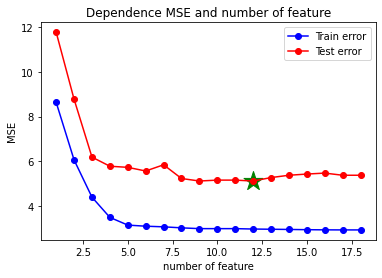

In [19]:
nf_array = range(1, len(X.columns) + 1)

mse_trains = []
mse_tests = []
best_features = []
for nf in nf_array:
    selector = RFE(lr_model, n_features_to_select=nf)
    selector.fit(X_train, y_train)
    
    best_feature = list(X_train.columns[selector.support_])
    best_features.append(best_feature)
    print(f'nf = {nf} -> {best_feature}')
    
    X_train_new = X_train[best_feature]
    X_test_new = X_test[best_feature]
    
    lr_model.fit(X_train_new, y_train)
    
    mse_trains.append(mean_squared_error(y_train, lr_model.predict(X_train_new)))
    mse_tests.append(mean_squared_error(y_test, lr_model.predict(X_test_new)))
    
fig, ax = plt.subplots()

ax.plot(nf_array, mse_trains, 'o-b', label = 'Train error')
ax.plot(nf_array, mse_tests, 'o-r', label = 'Test error')
ax.set(xlabel='number of feature',ylabel='MSE')
ax.legend()

best_point = min(mse_tests)
m = mse_tests.index(best_point) + 1
ax.scatter(m, best_point,s=400, c='g', marker='*')
ax.set_title('Dependence MSE and number of feature')

plt.show()

In [20]:
X_12_feature = df_possum[best_features[11]]
y = df_possum.iloc[:, 5]

X_12_feature = (X_12_feature - X_12_feature.mean(axis=0)) / (X_12_feature.std(axis=0))

X_with_constant = sm.add_constant(X_12_feature)
X_train, X_test, y_train, y_test = train_test_split(X_with_constant, y, train_size=0.7, random_state = 777)

lr_model_ols = sm.OLS(y_train, X_train).fit()

print(f'Determenation coeffition: {lr_model_ols.rsquared_adj}')
MSE_train = mean_squared_error(y_train, lr_model_ols.predict(X_train))
print(f'MSE train: {MSE_train}')
MSE_test = mean_squared_error(y_test, lr_model_ols.predict(X_test))
print(f'MSE train: {MSE_test}')

Determenation coeffition: 0.784726731722081
MSE train: 2.9607823207128225
MSE train: 5.1122022986639415
